In [1]:
from stability import  ParseVariable as pv
data = pv.read_ntuple('./', 'config.dat', 'loose25nsRun2')

Welcome to ROOTaaS 6.06/02
   id      tree                                               file
0  d1  selected  /Users/yhaddad/Projects/Test/ECALValidation/nt...
d1 	:  /Users/yhaddad/Projects/Test/ECALValidation/ntuples/merged-274241-274421.root


In [2]:
def zip_data(path, file, variable):
    run_ranges = pt.read_run_range(path=path,file=file)
    for id, range in run_ranges.items:
        print id, range
        
for name in data.dtype.fields:
    print '[] ', name

[]  energyEle
[]  classificationEle
[]  e_full5x5SCEle
[]  invMass_SC
[]  rawEnergySCEle
[]  gainEle
[]  invMass_SC_corr
[]  seedXSCEle
[]  e5x5SCEle
[]  chargeEle
[]  nPU
[]  invMass_e5x5
[]  etaSCEle
[]  nPV
[]  rawESEnergyPlane2SCEle
[]  etaEle
[]  PtEle
[]  invMass_mumu
[]  esEnergyPlane1SCEle
[]  energySCEle_must_regrCorr_ele
[]  energySCEle_corr
[]  nHitsSCEle
[]  runNumber
[]  energySCEle_pho_regrCorr
[]  phiMCEle
[]  mcGenWeight
[]  rawEnergySCEle_must
[]  esEnergySCEle
[]  etaMCEle
[]  esEnergyPlane2SCEle
[]  invMass_rawSC_must
[]  lumiBlock
[]  seedYSCEle
[]  phiSCEle
[]  fbremEle
[]  invMass_SC_must
[]  recoFlagsEle
[]  energySCEle_must
[]  energySigmaSCEle_must_regrCorr_ele
[]  invMass_SC_must_regrCorr_ele
[]  rho
[]  invMass_fulle5x5
[]  phiEle
[]  invMass_rawSC_esSC
[]  runTime
[]  avgLCSCEle
[]  pModeGsfEle
[]  invMass_MC
[]  HLTfire
[]  trackMomentumErrorEle
[]  pAtVtxGsfEle
[]  eleID
[]  pNormalizedChi2Ele
[]  eventNumber
[]  invMass_rawSC
[]  energyMCEle
[]  seedEnerg

In [3]:
run_ranges = pv.pt.read_run_range(path='./ntuples/',file='ICHEP_interval_100000.dat')
print data['nPV'].dtype == "int32"

run_ranges.head()

True


,run_number,Nevents,UnixTime,UnixTime_min,UnixTime_max,run_min,run_max,date_min,date_max,time
0,274240-274243,519847.0,1464616771-1464646821,1464616771,1464646821,274240,274243,2016-05-30 14:59:31,2016-05-30 23:20:21,2016-05-30 23:20:21
1,274244-274249,239759.0,1464647870-1464661693,1464647870,1464661693,274244,274249,2016-05-30 23:37:50,2016-05-31 03:28:13,2016-05-31 03:28:13
2,274250-274250,308441.0,1464674153-1464690452,1464674153,1464690452,274250,274250,2016-05-31 06:55:53,2016-05-31 11:27:32,2016-05-31 11:27:32
3,274251-274282,227015.0,1464690652-1464703380,1464690652,1464703380,274251,274282,2016-05-31 11:30:52,2016-05-31 15:03:00,2016-05-31 15:03:00
4,274283-274285,102310.0,1464751524-1464756985,1464751524,1464756985,274283,274285,2016-06-01 04:25:24,2016-06-01 05:56:25,2016-06-01 05:56:25


511,553,592,575,593,628,661,698,717,765,830,847,872,916,966,1050,1133,1174,1389,1502,1620,1886,2190,2730,3427,4430,5114,4435,2601,1221,413,115,35,26,10,15,14,12,8,11,4,0,4,1,0,0,1,1,2,0
0.800,0.806,0.812,0.818,0.824,0.830,0.836,0.842,0.848,0.854,0.860,0.866,0.872,0.878,0.884,0.890,0.896,0.902,0.908,0.914,0.920,0.926,0.932,0.938,0.944,0.950,0.956,0.962,0.968,0.974,0.980,0.986,0.992,0.998,1.004,1.010,1.016,1.022,1.028,1.034,1.040,1.046,1.052,1.058,1.064,1.070,1.076,1.082,1.088,1.094,1.100
[ 0.959] [ 0.9352778   0.96994042]


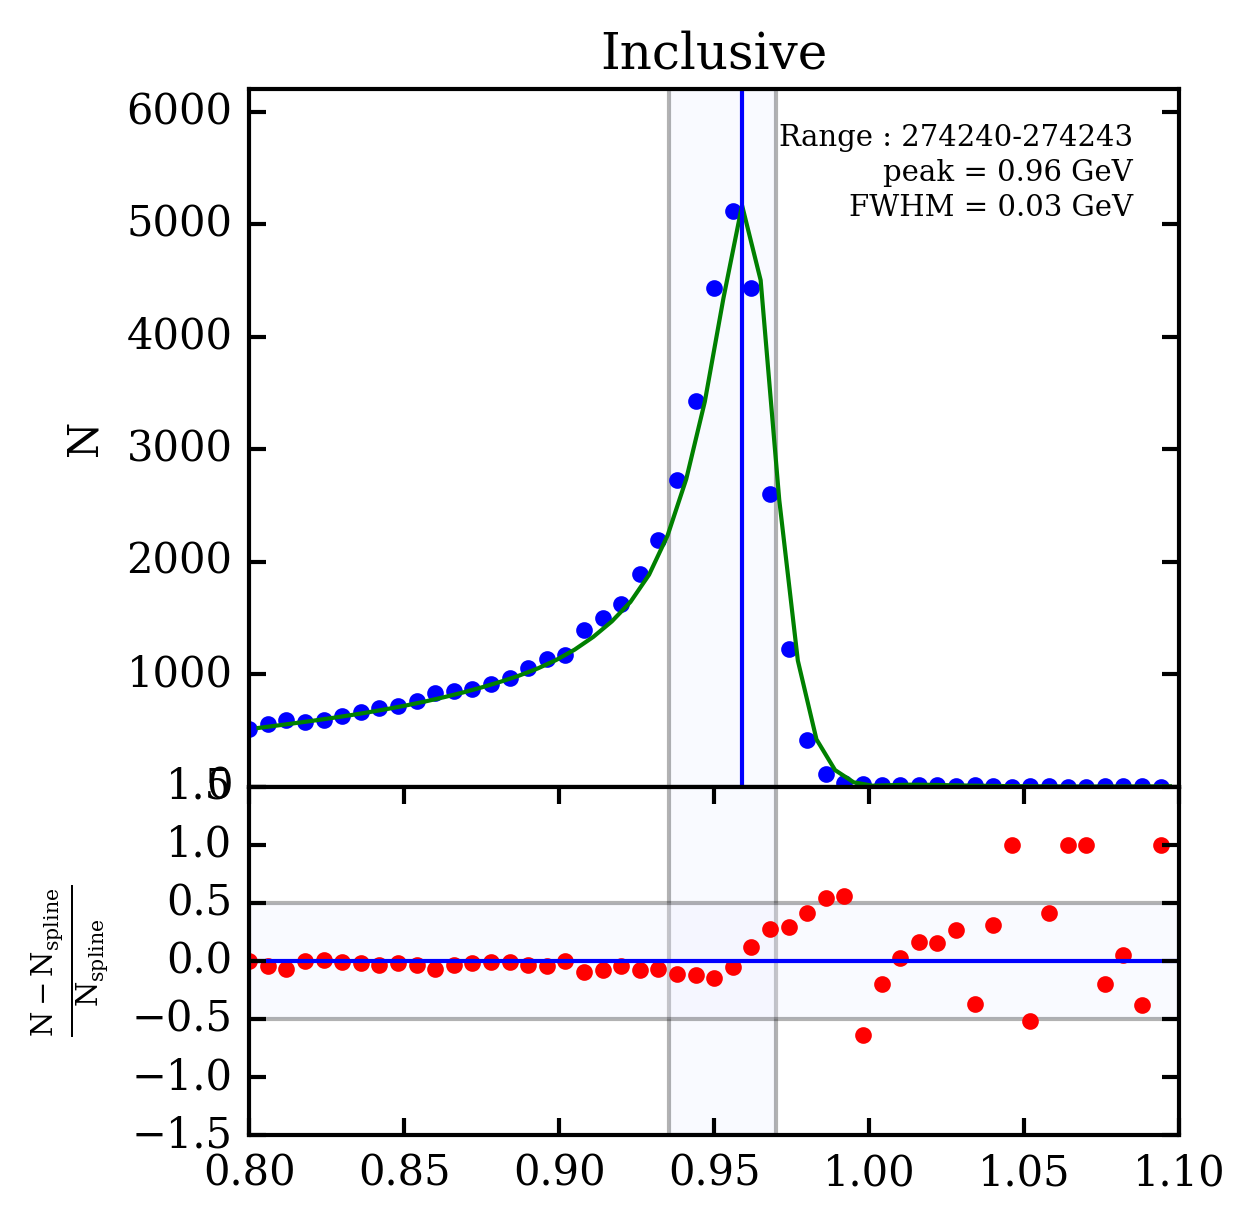

In [4]:
import numpy as np
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline, LSQUnivariateSpline
from scipy import signal,stats

import matplotlib.pyplot as plt
import peakutils
%matplotlib inline

variable = {'name':'R9Ele', 'range': [0,1.2]}

def bias_peak_monitor(xbin, hist, x, spl, label='', args = {}):
    
    fig = plt.figure(figsize=(4,4.5))
    plt.subplots_adjust(hspace=0)
    # ----------------------------------
    maximum = args.get( 'maximum' , max(hist))
    peaks   = args.get( 'peaks'   ,[np.mean(hist)])
    roots   = args.get( 'roots'   ,[0,10])
#     spl_min = args.get( 'spl_min' )
#     spl_max = args.get( 'spl_max' )
    # ----------------------------------
    ax1 = plt.subplot2grid((3,1), (0,0),rowspan=2)
    ax1.set_title(args.get('title'  ,'Inclusive'))
    ax1.text(0.95,0.95,'Range : ' + label,
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax1.transAxes,fontsize=7)
    ax1.text(0.95,0.90,'peak = %1.2f GeV'% (peaks[0]),
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax1.transAxes,fontsize=7)
    ax1.text(0.95,0.85,'FWHM = %1.2f GeV'% (max(roots)-min(roots)),
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax1.transAxes,fontsize=7)
    ax1.plot(xbin[:-1], hist   , '.')
    ax1.plot(x        , spl(x)      )
#     ax1.plot(x        , spl_max(x), 'y-' )
#     ax1.plot(x        , spl_min(x), 'y-' )
    for p in peaks: ax1.axvline(x=p)
    ax1.axvspan(min(roots),max(roots), facecolor='#eeefff', alpha=0.3)
    plt.ylim([0,maximum*1.2])
    
    ax1.tick_params(
        axis        = 'x'   , # changes apply to the x-axis
        which       = 'both', # both major and minor ticks are affected
        bottom      = 'off' , # ticks along the bottom edge are off
        top         = 'off' , # ticks along the top edge are off
        labelbottom = 'off' ) # labels along the bottom edge are off
    ax1.set_ylabel('N')
    ax2 = plt.subplot2grid((3,1), (2,0),sharex=ax1)
    ax2.axvspan(min(roots),max(roots), facecolor='#eeefff', alpha=0.3)
    # ----------------------------
    residuals = (spl(xbin[:-1])-hist)/spl(xbin[:-1])
    ax2.plot(xbin[:-1], residuals , 'r.' )
    plt.ylim([-1.5,1.5])
    ax2.axhline(y=0)
    ax2.axhspan(-0.5,0.5, facecolor='#eeefff', alpha=0.3)
    ax2.set_xlabel(args.get('title'  ,''))
    ax2.set_ylabel(r"$\frac{N-N_{spline}}{N_{spline}}$")
    plt.show()
    plt.savefig('log-plots/univariate-spline-' + label + '.png')
    plt.savefig('log-plots/univariate-spline-' + label + '.pdf')
    
def find_FWHM(bins, hist, hist_range, draw=True, label= ''):
    t = np.linspace(hist_range[0],hist_range[1],1000)
    x = [(bins[i+1]+bins[i])/2.0 for i in range(0,len(bins)-1)]
    yerr = np.sqrt(hist)
    w = 1.0/yerr
    w[w == np.inf] = 0
    spl     = UnivariateSpline(x, hist, w=w)
    maximum = spl(x)[np.argmax(spl(x))]
    spline  = LSQUnivariateSpline(bins[:-1],hist-maximum/2, bins[::3][1:-1])
    roots   = spline.roots()
    peak    = x[np.argmax(spline(x))]
    peaks   = spl.roots()
    
    indexes = peakutils.indexes(spl(x), thres=1/max(spl(x)), min_dist=50)
    peaks   = [x[p] for p in indexes]
    peaks   = stats.binned_statistic(peaks,peaks,bins=1,range=roots).statistic
    print peaks, roots
    if draw : bias_peak_monitor(bins, hist, 
                                x, spl, label=label, 
                                args = {
                                    'maximum' : maximum,
                                    'roots'   : roots,
                                    'peaks'   : peaks
#                     ,
#                                     'spl_min' : spl_min,
#                                     'spl_max' : spl_max
                                })
    
    return peak, min(roots), max(roots)

def sliced_data(data,variable,run_min,run_max):
    _data_ = data[np.logical_and(data['runNumber']>=run_min, data['runNumber']<=run_max)]
    _data_ =_data_[variables['name']]
    return _data_

# def monitor_variable(data, variables, runranges)
n = 0
for index, row in run_ranges.iterrows():
    if n > 0 : continue
    _data_ = data[np.logical_and(data['runNumber']>=row.run_min, data['runNumber']<=row.run_max)][variable['name']]
    _data_ = _data_[:,0]
    run_ranges.loc[index,variable['name'] + '_mean'] = _data_.mean()
    run_ranges.loc[index,variable['name'] + '_std' ] = _data_.std()
    run_ranges.loc[index,variable['name'] + '_nevt'] = _data_.size
    hist,bins = np.histogram(_data_, bins=50, range=[0.8,1.1] )
    print ','.join(["%i"%x for x in hist])
    print ','.join(["%1.3f"%x for x in bins])
    peak, rn, rp, = find_FWHM(bins, hist, 
                              hist_range=variable['range'], 
                              draw=True, label=str(run_ranges['run_number'][index]))
    run_ranges.loc[index,variable['name'] + '_fwhm_min'] = rn
    run_ranges.loc[index,variable['name'] + '_fwhm_max'] = rp
    run_ranges.loc[index,variable['name'] + '_peak'    ] = peak
    n = n + 1
    
run_ranges[variable['name'] + '_sem'  ] = run_ranges[variable['name'] + '_mean']/np.sqrt(run_ranges[variable['name'] + '_nevt'])
run_ranges[variable['name'] + '_stde' ] = run_ranges[variable['name'] + '_std' ]/np.sqrt(run_ranges[variable['name'] + '_nevt'])

In [5]:
run_ranges['bin']       = range(0,run_ranges.shape[0])
run_ranges['bin_error'] = 0.5*np.ones(run_ranges.shape[0])

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

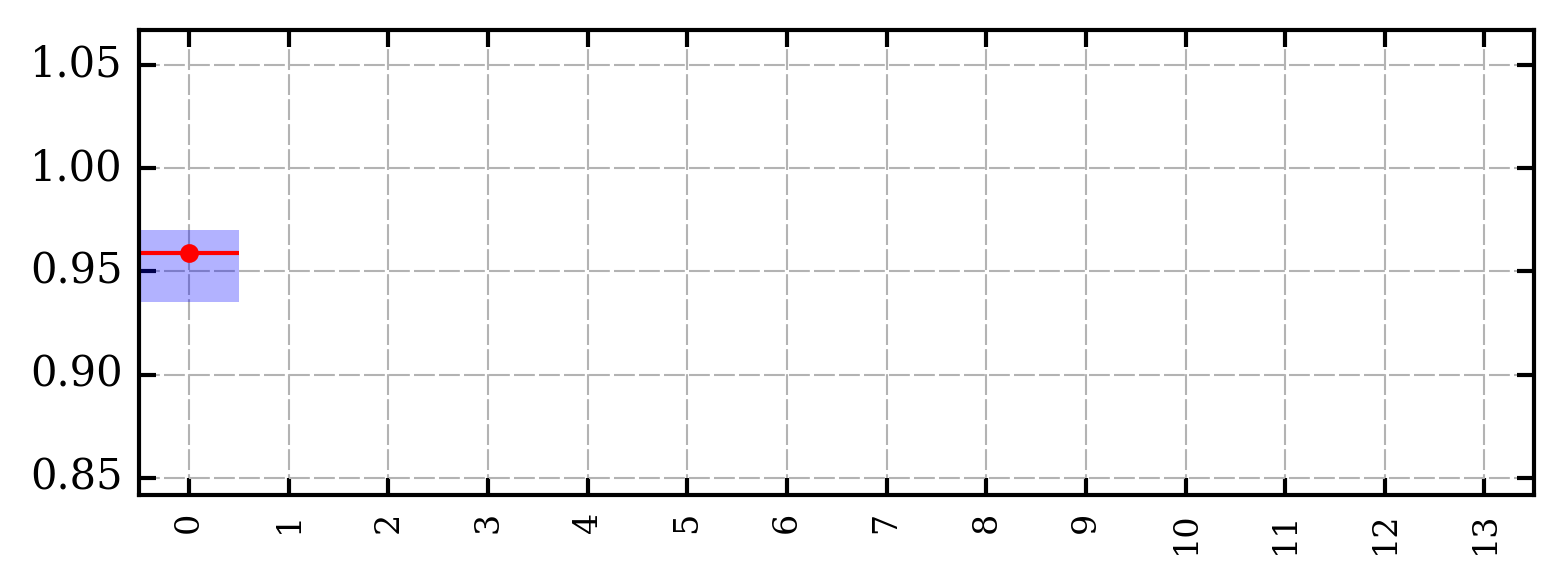

In [7]:
from   matplotlib.ticker import NullFormatter
from   matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as dates

# def scan_varible(variable, )
fig = plt.figure(figsize=(6,2))
ax  = plt.axes()

for k, spine in ax.spines.items():
        spine.set_zorder(10)
ax.grid(which='major', color='0.7' , linestyle='--',dashes=(5,1),zorder=0)
ax.grid(which='minor', color='0.85', linestyle='--',dashes=(5,1),zorder=0)
errors   = (run_ranges[ variable['name'] + '_fwhm_max' ]-run_ranges[ variable['name'] + '_fwhm_min' ])
position = (run_ranges[ variable['name'] + '_fwhm_max' ]+run_ranges[ variable['name'] + '_fwhm_min' ])/2.0
ax.bar( run_ranges['bin'], errors,
        bottom = position-errors/2.0,
        width  = 2*run_ranges['bin_error'], 
        color='b',alpha=0.3, zorder=9, align='center',edgecolor='None',lw=0)
ax.errorbar(run_ranges['bin'], 
            run_ranges[ variable['name'] + '_peak' ],
            xerr=run_ranges['bin_error'],
            capthick=0, marker='.',ms=7,ls='None', 
            zorder=10,color='red',ecolor='red',alpha=1)
ax.set_ylim((run_ranges[ variable['name'] + '_fwhm_min' ].min()*0.9,run_ranges[ variable['name'] + '_fwhm_max' ].max()*1.1))

xDataVar = 'run_max'
xData    = run_ranges[xDataVar]
evenX = True
ax.set_xlim((run_ranges['bin'].min()-0.5,run_ranges['bin'].max()+0.5))

if xDataVar == 'time':
    ax.xaxis.set_minor_locator(dates.DayLocator(interval=3))
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
elif (xDataVar == 'run_max' or xDataVar == 'run_min') and not evenX:
    majorLocator = MultipleLocator(125)
    minorLocator = MultipleLocator(62.5)
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_minor_locator(minorLocator)
    majorFormatter = FormatStrFormatter('%d')
    ax.xaxis.set_major_formatter(majorFormatter)
    xlabels = ax.get_xticklabels()
    plt.setp(xlabels, rotation=90, fontsize=10)
elif (xDataVar == 'run_max' or xDataVar == 'run_min') and evenX:
    majorLocator = MultipleLocator(1)
#     minorLocator = MultipleLocator(1)
    ax.xaxis.set_major_locator(majorLocator)
#     ax.xaxis.set_minor_locator(minorLocator)
    xlabels = ax.get_xticks().tolist()
    for i in range(0,len(xlabels)):
        xlabels[i] = str(i + 100)
    for i in range(len(xlabels)):
        if xlabels[i] < 200000: xlabels[i] = ''

    ax.set_xticklabels(xlabels)
    xlabels = ax.get_xticklabels()
    plt.setp(xlabels, rotation=90, fontsize=8)

ax.xaxis.grid(True, which="minor")
ax.yaxis.grid(True, which="minor")
plt.xticks(range(0,run_ranges.shape[0]),range(0,run_ranges.shape[0]))
plt.show()

In [8]:
run_ranges['bin'].max()

13

In [9]:
run_ranges.to_csv('run_range_var_scan.csv', sep='\t')


In [10]:
class variable(object):
    def __init__(self, name="", options = {}):
        self.__template__ = {
            "name"    : "",
            "title"   : "", 
            "range"   : []
        }
        self.__dict__ = self.__template__
        self.__dict__.update(options)
        self.name     = name

class monitoring(object):
    def __init__(self, ):
        self.data       = None
        self.run_ranges = None
        self.selection  = ""
        self.cfgfile    = ""
        self.variables  = {}
        
    def read_ntuple(path="./", cfg="", selection = 'loose'):
        config =  pd.read_csv(path + "/" + cfg , sep = " ", names = ['id', 'tree', 'file'], comment ="#")
        print config
        chain = r.TChain('merged')
        for index, root in config.iterrows():
            print index, "  merging the file : ", root.file
            chain.Add(root.file+'/'+root.tree)
        # transform this chain to an array ment to be used later by matplotlib
        self.data = tree2array( chain,
                           selection =  ecal_selections[selection],
                          )
        return self.data
        

def monitor(variable):
ax = plt.axes()
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid(True, which="minor")

for k, spine in ax.spines.items():
        spine.set_zorder(10)
        
ax.grid(which='major', color='0.7' , linestyle='--',dashes=(5,1),zorder=0)
ax.grid(which='minor', color='0.85', linestyle='--',dashes=(5,1),zorder=0)

ax.errorbar(run_ranges['bin'],run_ranges['nPV_std'],
             yerr=run_ranges['nPV_stde'  ],
             xerr=run_ranges['bin_error'],
             capthick=0,marker='o',ms=4,ls='None', zorder=10)
plt.ylim([0,10])

IndentationError: expected an indented block (<ipython-input-10-b389b2090d79>, line 35)

In [10]:
dd = data[np.logical_and(data['runNumber']>=274240, data['runNumber']<=274243)][variable]

In [11]:
dd

array([ 75.04383087,  78.62684631,  86.09919739, ...,  79.99633026,
        81.5131073 ,  74.5374527 ], dtype=float32)

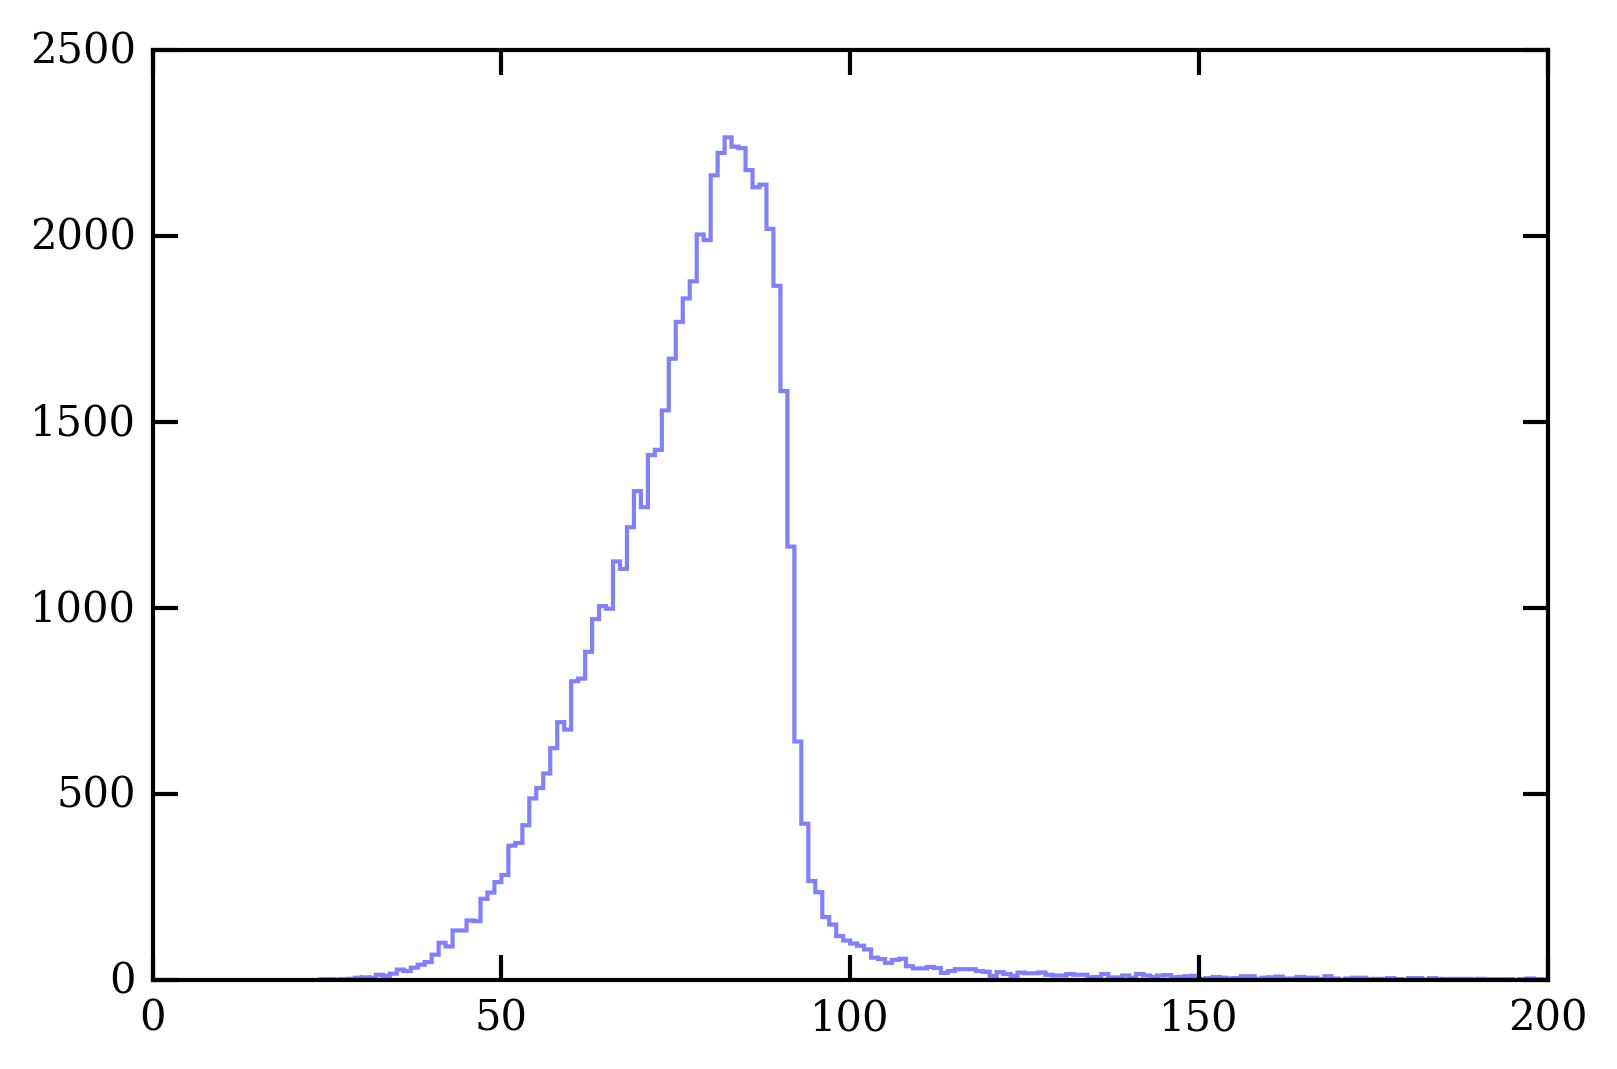

77.9214    20.7086


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(dd,bins=200, range=[0,200],alpha=0.5, histtype="step")
plt.show()
print dd.mean(), "  ", dd.std()

In [36]:
from scipy import stats

In [37]:
stats.describe(dd)

DescribeResult(nobs=61960, minmax=(24.264959, 831.87915), mean=77.921371, variance=428.85193, skewness=9.573086738586426, kurtosis=213.29286607531958)

In [38]:
dd[np.argmax(dd)]

831.87915

In [42]:
hist,bins = np.histogram(dd, bins=200,range=[0,200])

In [43]:
bins[np.argmax(hist)]

82.0

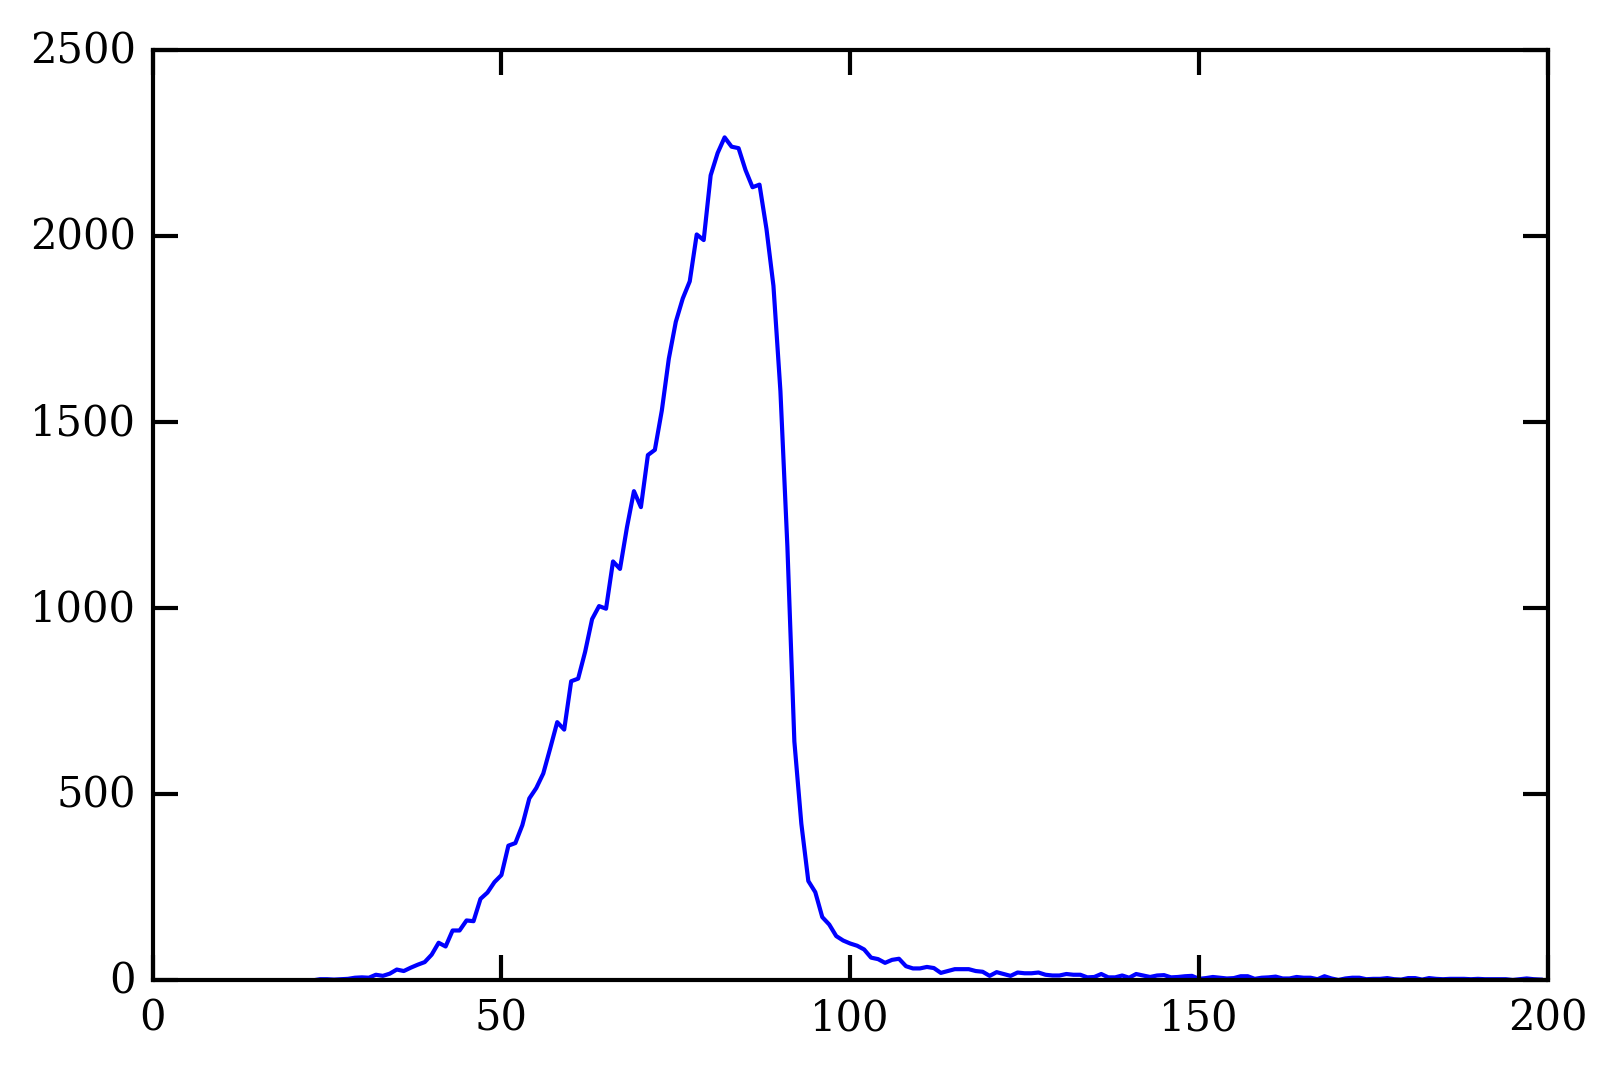

In [51]:
plt.plot(bins[:-1], hist)

In [52]:
import numpy as np
from scipy.interpolate import UnivariateSpline

In [63]:
spline = UnivariateSpline(bins[:-1], hist-hist[np.argmax(hist)]/2 , s=0)

In [64]:
r1, r2 = spline.roots()

In [65]:
r1,r2

(67.401803651834442, 91.062044155165822)

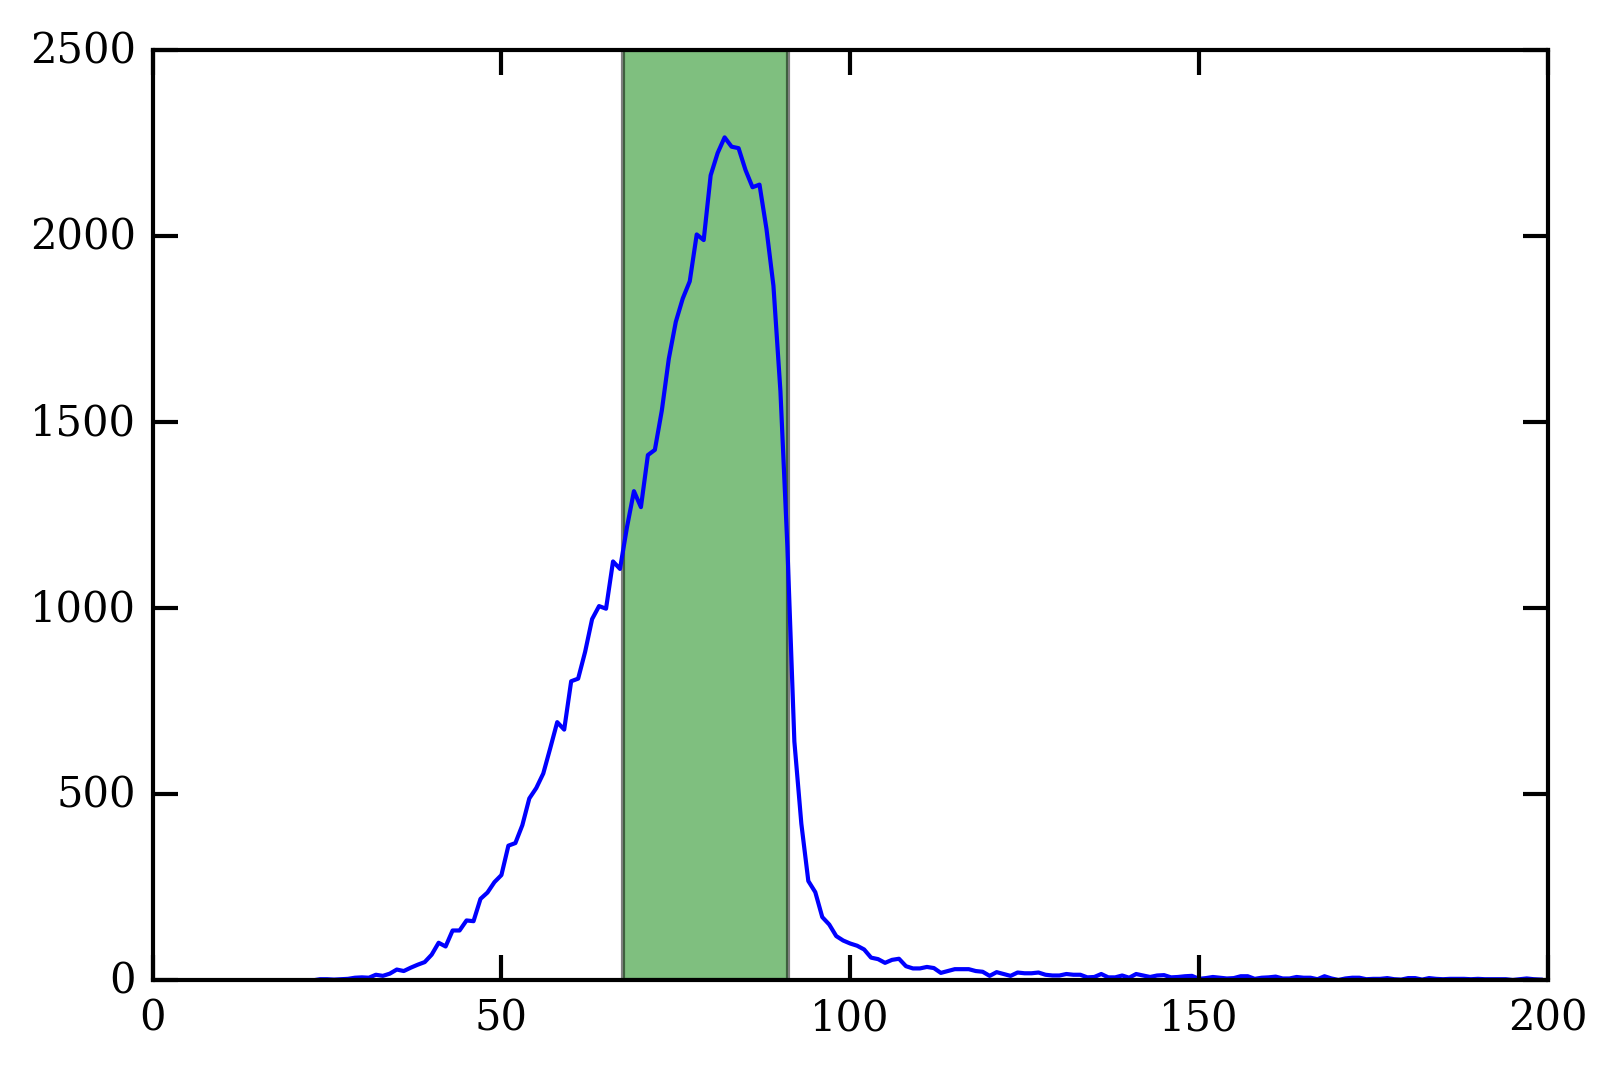

In [66]:
plt.plot(bins[:-1], hist)
plt.axvspan(r1, r2, facecolor='g', alpha=0.5)
plt.show()

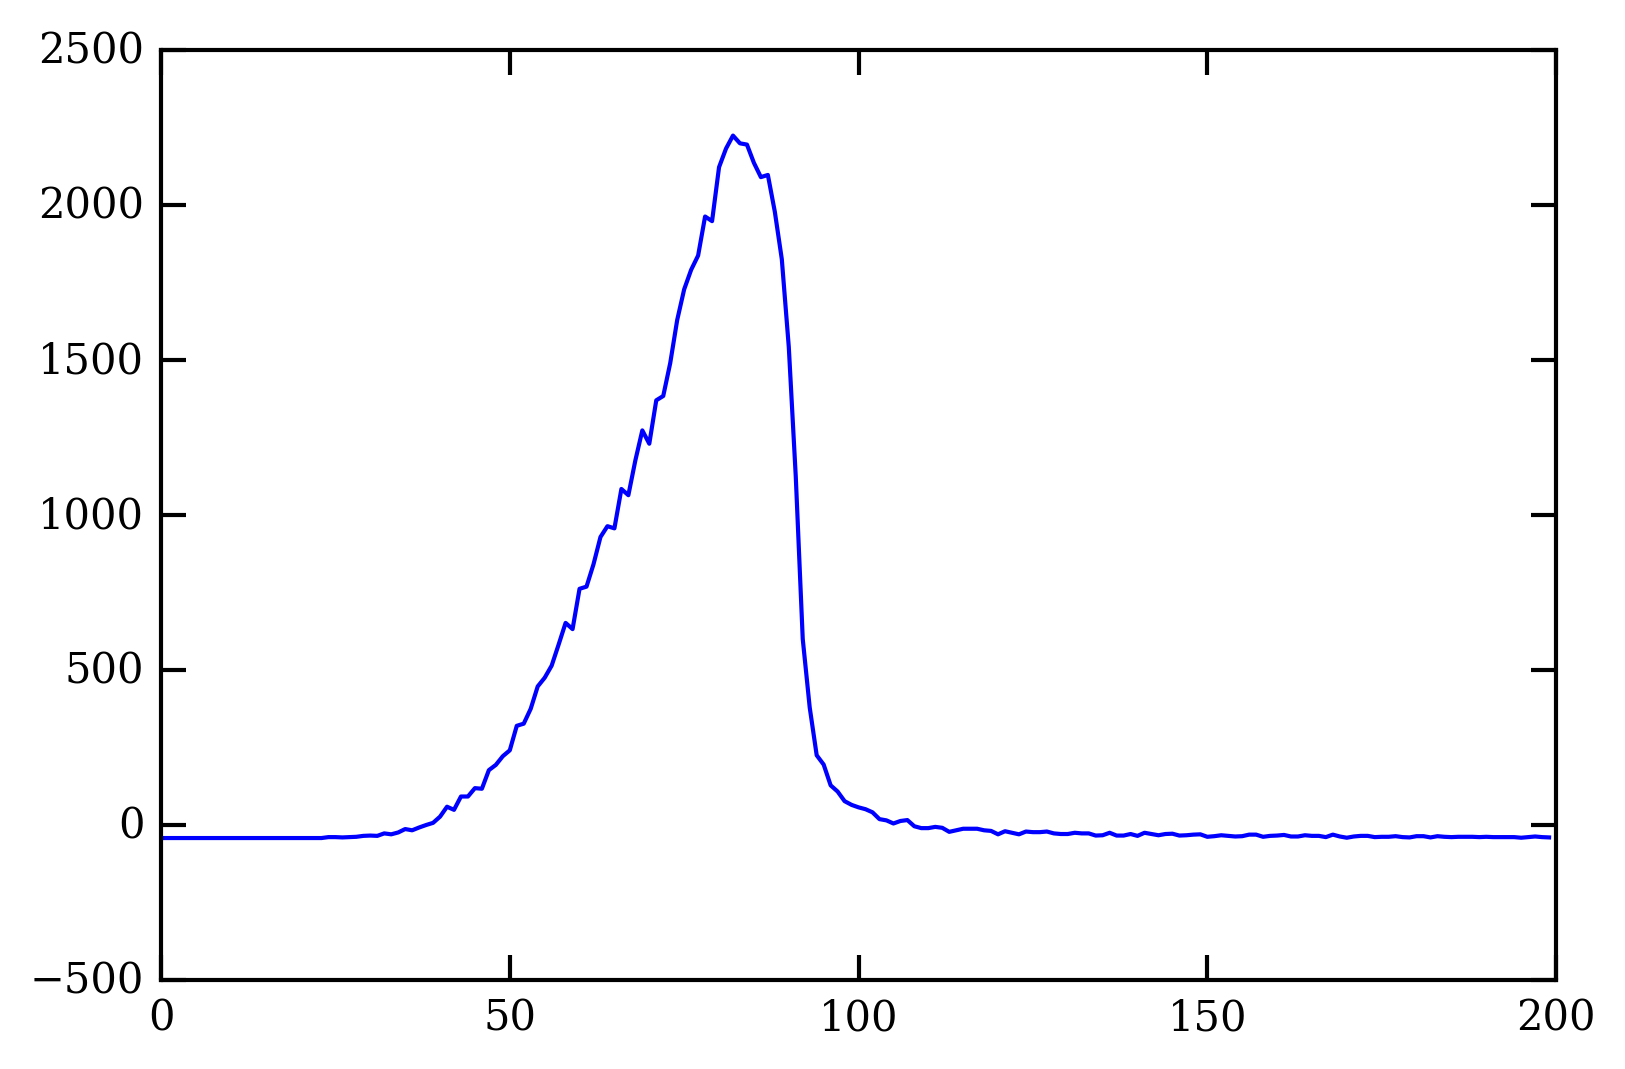

In [60]:
plt.plot(bins[:-1], spline(bins[:-1]))

In [62]:
hist[np.argmax(hist)]

2266